In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

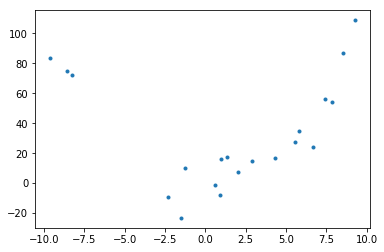

In [2]:
np.random.seed(0)
n_samples = 20
X = np.random.uniform(-10, 10, size=n_samples)
noise = np.random.normal(scale=10, size=n_samples)
y = X ** 2 + noise

plt.plot(X, y, '.')

In [3]:
X = np.atleast_2d(X).T

high_poly = PolynomialFeatures(degree=10)
X_ = high_poly.fit_transform(X)

In [4]:
degree_1 = LinearRegression().fit(X, y)
degree_10 = LinearRegression().fit(X_, y)

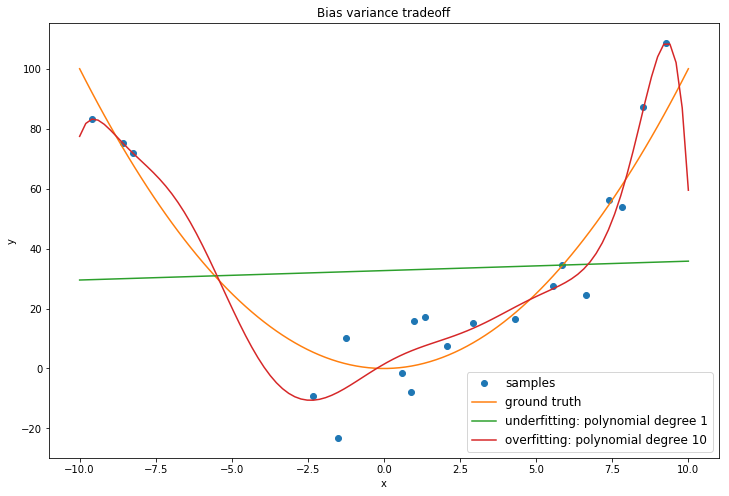

In [6]:
X_linspace = np.linspace(-10, 10, 100)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X, y, 'o', label='samples')
ax.plot(X_linspace, X_linspace **2, label='ground truth')
ax.plot(X_linspace, degree_1.predict(X_linspace.reshape(-1, 1)), label='underfitting: polynomial degree 1')
ax.plot(X_linspace, degree_10.predict(PolynomialFeatures(degree=10).fit_transform(X_linspace.reshape(-1, 1))), label='overfitting: polynomial degree 10')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Bias variance tradeoff')
ax.legend(fontsize='large')
fig.savefig('bias_variance_tradeoff.png')